In [50]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sb
import pyodbc 
import pandas as pd
import numpy as np
import sklearn as sk

In [88]:
##Connecting to sql database
# . means the local machine DESKTOP-GVGDMAA
# you can use the machine name or IP 192.168.1.2 , Which will be used in loading data from the cloud
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=192.168.1.2;'
                      'Database=mldatabase;'
                      'Trusted_Connection=yes;')
cursor = conn.cursor()
query= 'SELECT GroupID,WordType FROM groups'
cursor.execute(query)
for i in cursor:
    print(i)

('أسماء الإشارة', 'اسم')
('أعلام', 'اسم')
('أماكن', 'اسم')
('إن وأخواتها', 'حرف')
('أنهار', 'اسم')
('الأسماء الخمسة', 'اسم')
('الأسماء الموصولة', 'اسم')
('الطعام', 'اسم')
('بحار', 'اسم')
('حروف الاستفتاح', 'حرف')
('حروف الاستفهام', 'حرف')
('حروف التفسير', 'حرف')
('حروف الجر', 'حرف')
('حروف الجزم', 'حرف')
('حروف الشرط', 'حرف')
('حروف العطف', 'حرف')
('حروف القسم', 'حرف')
('حروف النصب', 'حرف')
('حروف النفي', 'حرف')
('حروف الهجاء', 'حرف')
('حيوانات', 'اسم')
('كان وأخواتها', 'فعل')
('محافظات', 'اسم')
('معالم سياحية', 'اسم')
('ملابس', 'اسم')
('مناسبات', 'اسم')
('مناطق مشهورة', 'اسم')
('نباتات', 'اسم')


In [89]:
SQLdf = pd.read_sql(query, conn)
SQLdf

,GroupID,WordType
0,أسماء الإشارة,اسم
1,أعلام,اسم
2,أماكن,اسم
3,إن وأخواتها,حرف
4,أنهار,اسم
5,الأسماء الخمسة,اسم
6,الأسماء الموصولة,اسم
7,الطعام,اسم
8,بحار,اسم
9,حروف الاستفتاح,حرف


In [92]:
#reading data from procedure
SQLdf = pd.read_sql("sp_groups", conn)
SQLdf= SQLdf[['GroupID','WordType']] 
SQLdf

,GroupID,WordType
0,أسماء الإشارة,اسم
1,أعلام,اسم
2,أماكن,اسم
3,إن وأخواتها,حرف
4,أنهار,اسم
5,الأسماء الخمسة,اسم
6,الأسماء الموصولة,اسم
7,الطعام,اسم
8,بحار,اسم
9,حروف الاستفتاح,حرف


In [93]:
#reading data from view
SQLdf = pd.read_sql("select * from vwgroups", conn)
SQLdf= SQLdf[['GroupID','WordType']] 
SQLdf

,GroupID,WordType
0,أسماء الإشارة,اسم
1,أعلام,اسم
2,أماكن,اسم
3,إن وأخواتها,حرف
4,أنهار,اسم
5,الأسماء الخمسة,اسم
6,الأسماء الموصولة,اسم
7,الطعام,اسم
8,بحار,اسم
9,حروف الاستفتاح,حرف


# Matplotlib Liberary Visualization Samples

In [94]:
groupeddf = SQLdf.groupby("WordType").count()
groupeddf

,GroupID
WordType,
اسم,15
حرف,12
فعل,1


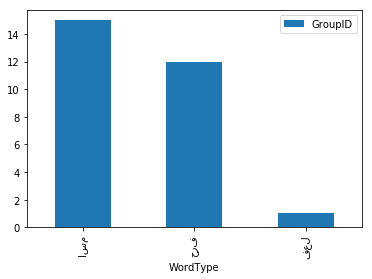

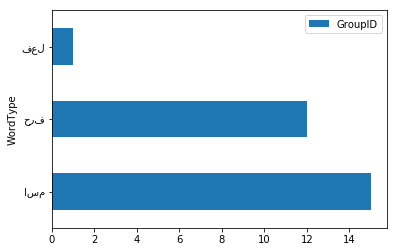

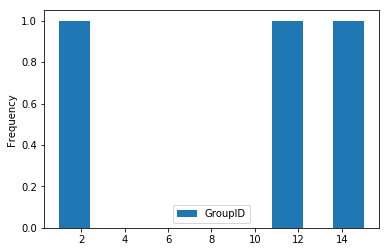

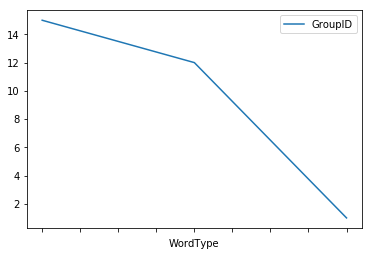

In [104]:
groupeddf.plot.bar()
groupeddf.plot.barh()
groupeddf.plot.hist()
groupeddf.plot.line()